In [2]:
import yfinance as yf
dax = yf.Ticker('^GDAXI')
DAX = dax.history(start='2000-1-1') 
print(DAX[['Open', 'High', 'Low', 'Close', 'Volume']].head(2))

               Open     High      Low    Close    Volume
Date                                                    
2000-01-03  6961.72  7159.33  6720.87  6750.76  43072500
2000-01-04  6747.24  6755.36  6510.46  6586.95  46678400


<class 'pandas.core.series.Series'>


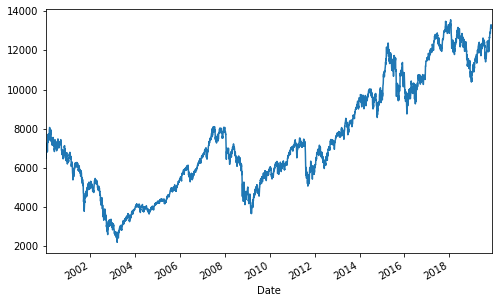

In [3]:
%matplotlib inline
DAX['Close'].plot(figsize=(8, 5))

In [4]:
import numpy as np
DAX['Return'] = np.log(DAX['Close']/DAX['Close'].shift(1))
print(DAX[['Open', 'High', 'Low', 'Close', 'Return']].head(2))

               Open     High      Low    Close    Return
Date                                                    
2000-01-03  6961.72  7159.33  6720.87  6750.76       NaN
2000-01-04  6747.24  6755.36  6510.46  6586.95 -0.024565


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0184f3a20>,
      dtype=object)

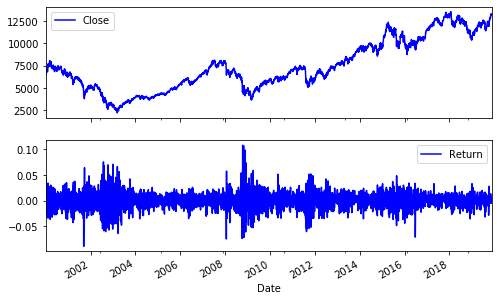

In [9]:
DAX[['Close', 'Return']].plot(subplots=True, style='b', figsize=(8, 5))

In [13]:
DAX['Moving_Vol'] = np.round(DAX['Close'].rolling(252).std()*np.sqrt(252), 2)
print(DAX[['Open', 'High', 'Low', 'Close', 'Return', 'Moving_Vol']].head(2))

               Open     High      Low    Close    Return  Moving_Vol
Date                                                                
2000-01-03  6961.72  7159.33  6720.87  6750.76       NaN         NaN
2000-01-04  6747.24  6755.36  6510.46  6586.95 -0.024565         NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc028350e10>,
      dtype=object)

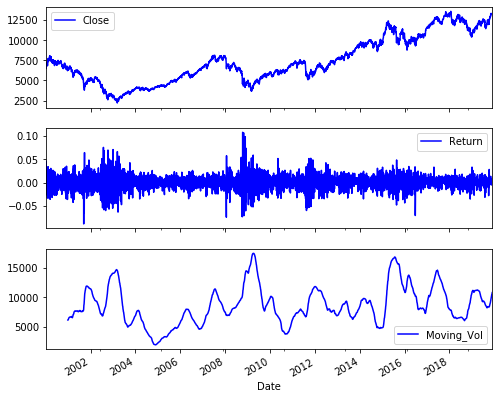

In [14]:
DAX[['Close', 'Return', 'Moving_Vol']].plot(subplots=True, style='b',
                                            figsize=(8, 7))

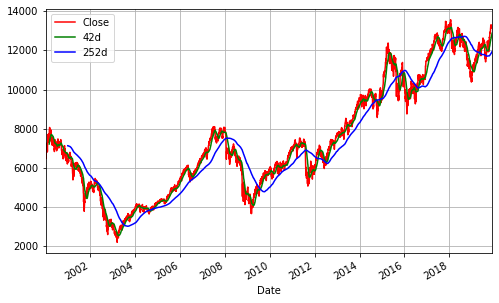

In [16]:
DAX['42d'] = np.round(DAX['Close'].rolling(42).mean(), 2)
DAX['252d'] = np.round(DAX['Close'].rolling(252).mean(), 2)
DAX[['Close', '42d', '252d']].plot(grid=True, figsize=(8, 5), color=['r','g','b'])